In [46]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [4]:
server = 'mmm-adf-optimization.database.windows.net, 1433' 
database = 'airbnb' 
username = 'adfsa' 
password = 'R0ck&R0ll' 

cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

In [8]:
sql = '''
create view airbnb_cleaned
as
select 
l.[listing_id] as id, 
l.[name] as name, 
l.[host_id] as host_id,  
h.[host_name_primary] as host_name_primary, 
h.[host_name_secondary] as host_name_secondary, 
n.[neighbourhood] as neighbourhood,
loc.[location_id], 
loc.[latitude], 
loc.[longitude], 
room.room_type,
l.[price], 
l.[minimum_nights], 
r.[number_of_reviews], 
r.[last_review], 
r.[reviews_per_month],
h.[calculated_host_listings_count],
l.[availability_365], 
l.[quality_minimum_nights_long],
l.quality_availability_365,
l.quality_price_outlier,
r.quality_last_review_ismissing,
r.quality_reviews_per_month_ismissing,
r.quality_num_missing

from [dbo].[listing] l
INNER JOIN host h on h.host_id = l.host_id
INNER JOIN location loc on loc.[location_id] = l.location_id
INNER JOIN neighbourhood n on n.neighbourhood_id = loc.neighbourhood_id
INNER JOIN review_summary r on r.listing_id = l.listing_id
INNER JOIN room_type room on room.room_type_id = l.room_type_id

'''

In [9]:
cnxn.execute(sql)

cnxn.commit()

In [10]:
sql = '''
select neighbourhood, AVG(price) as avg_price
from airbnb_cleaned
group by
neighbourhood
order by
avg_price desc
'''

In [11]:
sql_query = pd.read_sql_query(sql,cnxn) # here, the 'conn' is the variable that contains your database connection information from step 2

df_uncleaned = pd.DataFrame(sql_query)

In [12]:
df_uncleaned

,neighbourhood,avg_price
0,Near North Side,275.7950
1,Archer Heights,248.3333
2,Near South Side,222.8169
3,Loop,217.8473
4,Lincoln Park,196.3184
...,...,...
70,West Elsdon,47.7000
71,North Lawndale,46.5818
72,Calumet Heights,41.6923
73,West Englewood,33.0425


In [21]:
sql = '''
select neighbourhood, AVG(price) as avg_price
from airbnb_cleaned
where
quality_last_review_ismissing = 0 and
quality_reviews_per_month_ismissing = 0
group by
neighbourhood
order by
avg_price desc
'''

In [65]:
sql_query = pd.read_sql_query(sql,cnxn) # here, the 'conn' is the variable that contains your database connection information from step 2

df_filtered = pd.DataFrame(sql_query)
df_filtered.to_csv ('analysis_filtered.csv', index = False)

In [66]:
df_filtered

,neighbourhood,room_type,avg_price
0,Archer Heights,Entire home/apt,359.0000
1,South Shore,Shared room,290.5714
2,Near North Side,Entire home/apt,285.8180
3,Near North Side,Private room,264.6052
4,Near South Side,Entire home/apt,249.1610
...,...,...,...
173,South Chicago,Shared room,23.7500
174,Lower West Side,Shared room,22.5000
175,North Lawndale,Shared room,18.3636
176,Calumet Heights,Shared room,13.8571


In [67]:
sql = '''
select neighbourhood, AVG(price) as avg_price
from airbnb_cleaned
where
quality_price_outlier = 0 and
quality_last_review_ismissing = 0 and
quality_reviews_per_month_ismissing = 0
group by
neighbourhood
order by
avg_price desc
'''

In [68]:
sql_query = pd.read_sql_query(sql,cnxn) # here, the 'conn' is the variable that contains your database connection information from step 2

df_filtered_no_price_outliers = pd.DataFrame(sql_query)
df_filtered_no_price_outliers.to_csv ('analysis_filtered_no_price_outliers.csv', index = False)

In [69]:
df_filtered_no_price_outliers

,neighbourhood,avg_price
0,Archer Heights,248.3333
1,Near North Side,219.4875
2,Loop,196.6276
3,Near South Side,195.4876
4,Lincoln Park,181.0583
...,...,...
68,West Elsdon,47.7000
69,North Lawndale,46.5918
70,Calumet Heights,41.6923
71,West Englewood,30.9069


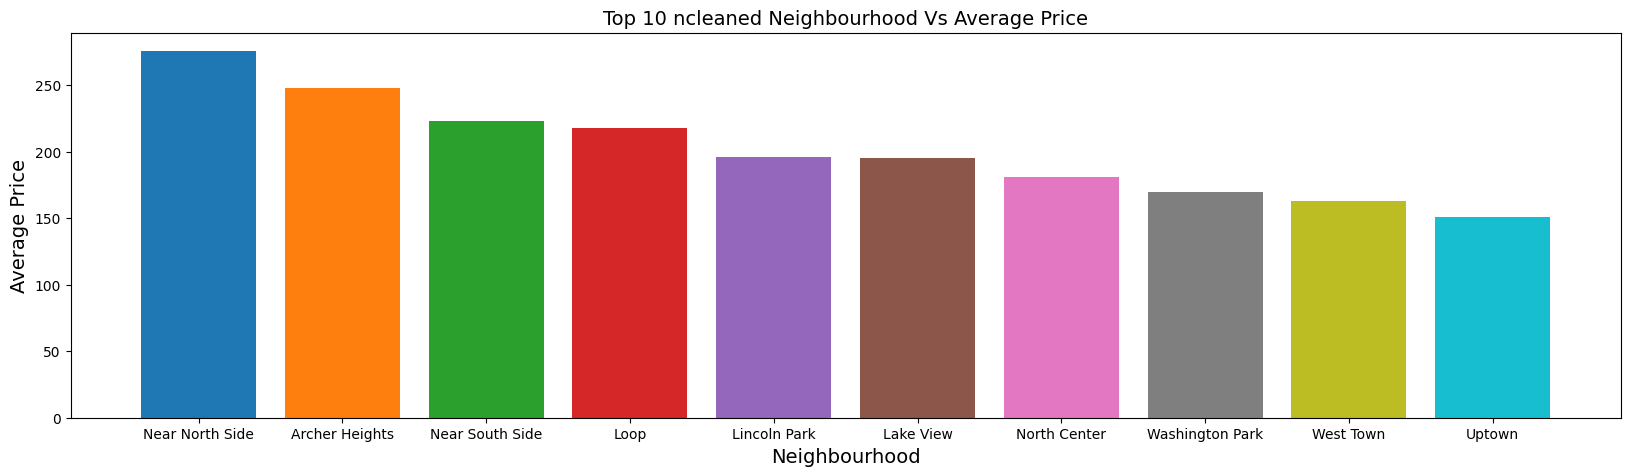

In [71]:
New_Colors = mcolors.TABLEAU_COLORS
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5

plt.bar(df_uncleaned['neighbourhood'].head(10), df_uncleaned['avg_price'].head(10) , color=New_Colors)
plt.title('Top 10 ncleaned Neighbourhood Vs Average Price', fontsize=14)
plt.xlabel('Neighbourhood', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.grid(False)
plt.show()

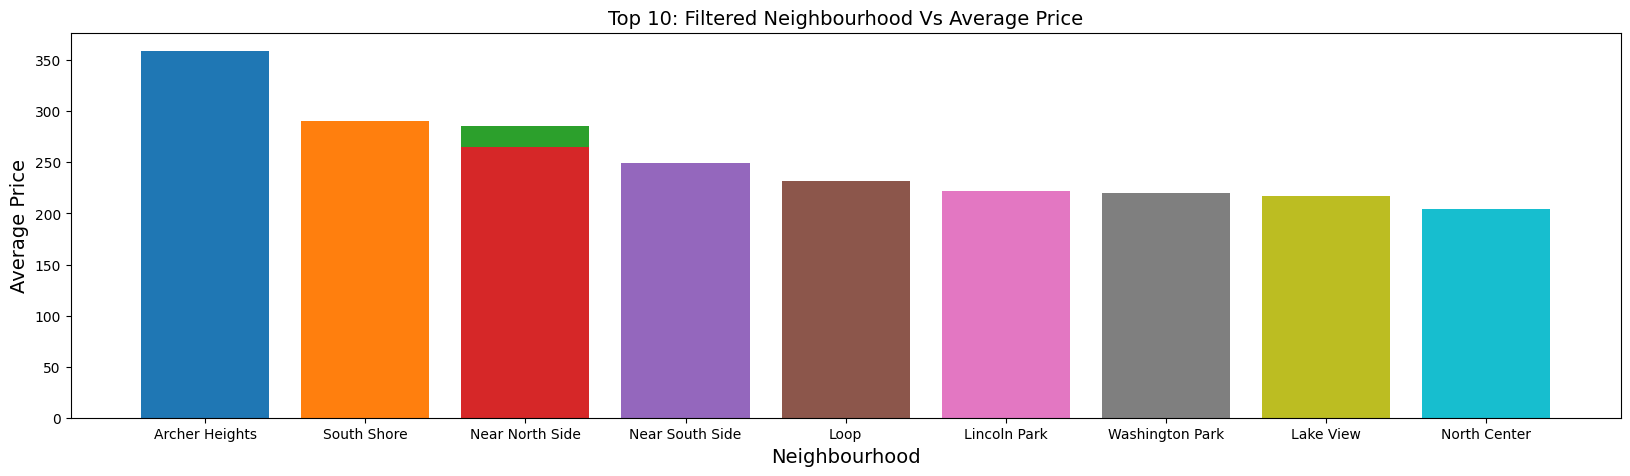

In [72]:
New_Colors = mcolors.TABLEAU_COLORS
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5

plt.bar(df_filtered['neighbourhood'].head(10), df_filtered['avg_price'].head(10) , color=New_Colors)
plt.title('Top 10: Filtered Neighbourhood Vs Average Price', fontsize=14)
plt.xlabel('Neighbourhood', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.grid(False)
plt.show()

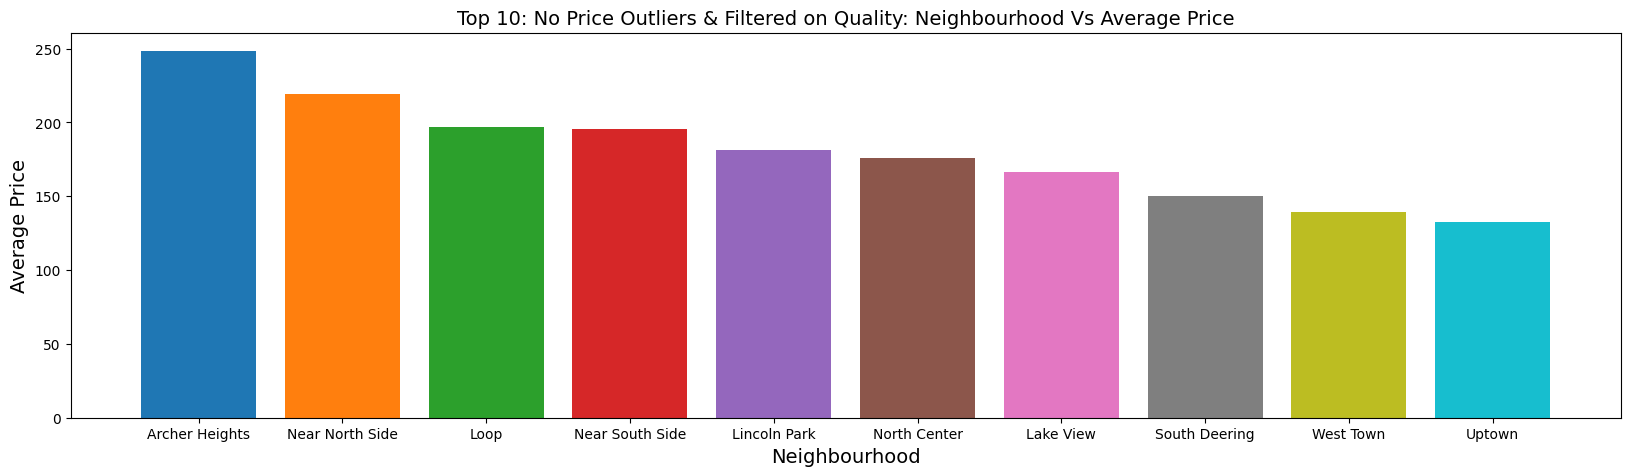

In [73]:
New_Colors = mcolors.TABLEAU_COLORS
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5

plt.bar(df_filtered_no_price_outliers['neighbourhood'].head(10), df_filtered_no_price_outliers['avg_price'].head(10) , color=New_Colors)
plt.title('Top 10: No Price Outliers & Filtered on Quality: Neighbourhood Vs Average Price', fontsize=14)
plt.xlabel('Neighbourhood', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.grid(False)
plt.show()